In [6]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, extract_vars)
import pvlib
import pandas as pd
import numpy as np
import xarray as xr
from pathlib import Path

In [7]:
#test

file_path = 'data/wrfout_d01_2021-06-15_00%3A00%3A00'

# Open the NetCDF file
dataset = nc.Dataset(file_path)

temp = getvar(dataset, "o3")

temp.shape

print(np.max(getvar(dataset, "XLONG")))

<xarray.DataArray 'XLONG' ()>
array(-59.88366699)
Coordinates:
    Time     datetime64[ns] 2021-06-15


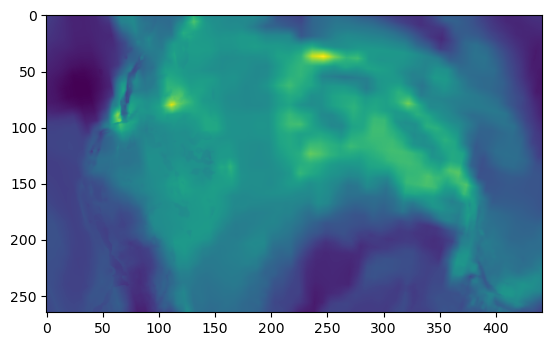

In [8]:
#test

plt.imshow(temp[10])

In [9]:
#test

helper_x=[]
helper_y=[]
helper_z=np.zeros((47, 265, 442))

temp_x=getvar(dataset, "XLONG")
temp_y=getvar(dataset, "XLAT")

for i in range(0, 47):
    for j in range(0, 265):
        for k in range(0, 442):
            helper_z[i][j][k]=i

    helper_x.append(temp_x)
    helper_y.append(temp_y)




np.shape(helper_x)

(47, 265, 442)

In [10]:

#test
features=["PM2_5_DRY","co", "no2", "o3", "so2", "PM10", "QVAPOR", "T", "P", "U", "V", "W"] #long, lat, z, 4 seasons

x=[]

#normal shape is (47, 265, 442)
#U shape is (47,265,443)
#V shape is (47, 266, 442)
#W shape is (48, 265, 442)
for feature in features:
    if feature=="U":
        x.append(getvar(dataset, feature)[:,:,:-1])
    elif feature=="V":
        x.append(getvar(dataset, feature)[:,:-1])
    elif feature=="W":
        x.append(getvar(dataset, feature)[:-1])

    else:
        x.append(getvar(dataset, feature))
    



x.append(helper_x)
x.append(helper_y)
x.append(helper_z)   
print(np.shape(x))

name=Path(file_path).stem
name=name.split("-")
print(name)


#x.append(np.zeros((12, 47, 265, 442)))

print(int(name[1]))

for i in range(1, 13):
    if i!=int(name[1]):
        
        x.append(np.zeros((47, 265, 442)))
    elif i==int(name[1]):
       
        x.append(np.ones((47,265,442)))
    else:
        raise("Broke during adding months")

np.shape(x)


(15, 47, 265, 442)
['wrfout_d01_2021', '06', '15_00%3A00%3A00']
6


(27, 47, 265, 442)

In [11]:

features=["PM2_5_DRY","co", "no2", "o3", "so2", "PM10", "QVAPOR", "T", "P", "U", "V", "W"] #long, lat, z, 4 seasons


def extract_data(path, seq_length):
    dataset=[]
    frames=[]
    frame_num=0
    files=Path(path).glob("*")
    for file in files:
        x=[]
        print(file.stem)
        data=nc.Dataset(file)
        
        helper_x=[]
        helper_y=[]
        helper_z=np.zeros((47, 265, 442))

        temp_x=getvar(data, "XLONG")
        temp_y=getvar(data, "XLAT")

        for i in range(0, 47):
            for j in range(0, 265):
                for k in range(0, 442):
                    helper_z[i][j][k]=i

            helper_x.append(temp_x)
            helper_y.append(temp_y)
        
        for feature in features:
            if feature=="U":
                x.append(getvar(data, feature)[:,:,:-1])
            elif feature=="V":
                x.append(getvar(data, feature)[:,:-1])
            elif feature=="W":
                x.append(getvar(data, feature)[:-1])

            else:
                x.append(getvar(data, feature))

        
        x.append(helper_x)
        x.append(helper_y)
        x.append(helper_z)   

        name=Path(file).stem
        name=name.split("-")

        
        #add seasons
        if 12==int(name[1]) or 1==int(name[1]) or 2==int(name[1]):
            
            x.append(np.ones((47, 265, 442)))
        else:
            x.append(np.zeros((47, 265, 442)))

        if 3==int(name[1]) or 4==int(name[1]) or 5==int(name[1]):
            
            x.append(np.ones((47, 265, 442)))
        else:
            x.append(np.zeros((47, 265, 442)))

        if 6==int(name[1]) or 7==int(name[1]) or 8==int(name[1]):
            
            x.append(np.ones((47, 265, 442)))
        else:
            x.append(np.zeros((47, 265, 442)))

        if 9==int(name[1]) or 10==int(name[1]) or 11==int(name[1]):
            
            x.append(np.ones((47, 265, 442)))
        else:
            x.append(np.zeros((47, 265, 442)))
            

        frames.append(x)
        frame_num+=1
        if frame_num==seq_length:
            frame_num=0
            dataset.append(frames)
            frames=[]
        
        print(np.shape(dataset))

    return dataset


path=r"data"
train=extract_data(path, 3)

path=r"testing data"
test=extract_data(path, 3)

        
    


wrfout_d01_2021-06-15_00%3A00%3A00
(0,)
wrfout_d01_2021-06-15_01%3A00%3A00
(0,)
wrfout_d01_2021-06-15_02%3A00%3A00
(1, 3, 19, 47, 265, 442)
wrfout_d01_2021-06-15_03%3A00%3A00
(1, 3, 19, 47, 265, 442)
wrfout_d01_2021-06-15_04%3A00%3A00
(1, 3, 19, 47, 265, 442)
wrfout_d01_2021-06-15_05%3A00%3A00
(2, 3, 19, 47, 265, 442)
wrfout_d01_2021-06-15_06%3A00%3A00
(2, 3, 19, 47, 265, 442)
wrfout_d01_2021-06-15_07%3A00%3A00
(2, 3, 19, 47, 265, 442)
wrfout_d01_2021-06-15_08%3A00%3A00
(3, 3, 19, 47, 265, 442)
wrfout_d01_2021-06-15_09%3A00%3A00
(3, 3, 19, 47, 265, 442)
wrfout_d01_2021-06-15_10%3A00%3A00
(3, 3, 19, 47, 265, 442)
wrfout_d01_2021-06-15_11%3A00%3A00
(4, 3, 19, 47, 265, 442)


In [13]:
train_swap=np.swapaxes(train, 1, 2)


In [14]:
print(train_swap.shape)

(4, 19, 3, 47, 265, 442)


In [15]:
#output is (Batch size, channels, frames, depth, length, width)

np.save("npys/data", train_swap)
